## Topic modeling
- https://happy-obok.tistory.com/5

In [3]:
# 기본적인 모듈 설치
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# 

### Naver 뉴스 기사 토픽모델링하기
- 키워드: 미세먼지

### 데이터 불러오기

In [30]:
naver_article = pd.read_csv('/content/drive/MyDrive/2022년도 겨울 특강-텍스트마이닝/Text_mining_3강/data/final_article_data.csv' )
naver_article

,title,date,contents
0,"서울시민 ""감염병이 미세먼지·기후변화보다 더 위험해""",2021.12.29. 오전 6:00,"서울시 보건환경연구원 조사…""건강상 피해 경험은 미세먼지"" 오늘도 반복되는 하루..."
1,'초미세먼지 가득' 갑갑한 하늘…내일부터 공기질 회복,2021.12.29. 오전 5:01,기사내용 요약 수도권·영서·충청·호남·부산·대구·경북 '나쁨' 대기 정체와 국외 유...
2,‘환경위성·인공지능’ 활용해 미세먼지 영상으로 구현,2021.12.29. 오후 12:00,환경 위성과 인공지능 기법을 활용한 지상 초미세먼지(PM2.5)·미세먼지(PM10)...
3,[오늘 날씨] 수도권 미세먼지 '나쁨'… 전국 대부분 평년 기온 회복,2021.12.29. 오전 4:56,29일은 추위가 한풀 꺾이는 대신 미세먼지 수치가 오른다. 사진은 미세먼지·초미세먼...
4,中 초미세먼지 2013년 후 최저치라는데...WHO기준 6배,2021.12.31. 오전 8:32,- 올해 1~11월 베이징 평균 초미세먼지 농도 33㎍/㎥...WHO기준은 5㎍/㎥...
...,...,...,...
514,관광 특화 공공데이터 개방해 고용 창출,2022.01.27. 오후 6:33,부산관광공사 작년 뉴딜사업 결과 음식점 정보 등 약 220만건 제공 인턴 등 청년 ...
515,"이글루시큐리티, 최신 침해사고 재현한 AI 데이터셋 구축",2022.01.26. 오전 10:55,이글루시큐리티는 주요 침해사고를 재현한 1억2000만건의 데이터셋 구축을 완료했다고...
516,"디지털 리얼티, 국내 첫 데이터 센터 ‘디지털 서울’ 오픈",2022.01.26. 오후 1:31,디지털 리얼티 한국서 첫 번째 데이터 센터 ‘디지털 서울 (ICN10)’ 공식 개관...
517,'귀농할 내땅은 어디에?' 농식품 공공데이터 19종 신규 개방,2022.01.26. 오전 11:15,"농식품부, 스마트팜 혁신밸리·전원마을 현황 등 공개 [파이낸셜뉴스] 농림축산식품..."


In [31]:
type(naver_article.title[1])

str

In [34]:
unique_article = naver_article.drop_duplicates(['title'])
unique_article

,title,date,contents
0,"서울시민 ""감염병이 미세먼지·기후변화보다 더 위험해""",2021.12.29. 오전 6:00,"서울시 보건환경연구원 조사…""건강상 피해 경험은 미세먼지"" 오늘도 반복되는 하루..."
1,'초미세먼지 가득' 갑갑한 하늘…내일부터 공기질 회복,2021.12.29. 오전 5:01,기사내용 요약 수도권·영서·충청·호남·부산·대구·경북 '나쁨' 대기 정체와 국외 유...
2,‘환경위성·인공지능’ 활용해 미세먼지 영상으로 구현,2021.12.29. 오후 12:00,환경 위성과 인공지능 기법을 활용한 지상 초미세먼지(PM2.5)·미세먼지(PM10)...
3,[오늘 날씨] 수도권 미세먼지 '나쁨'… 전국 대부분 평년 기온 회복,2021.12.29. 오전 4:56,29일은 추위가 한풀 꺾이는 대신 미세먼지 수치가 오른다. 사진은 미세먼지·초미세먼...
4,中 초미세먼지 2013년 후 최저치라는데...WHO기준 6배,2021.12.31. 오전 8:32,- 올해 1~11월 베이징 평균 초미세먼지 농도 33㎍/㎥...WHO기준은 5㎍/㎥...
...,...,...,...
513,"롯데카드, 데이터 기반 비즈니스 협업 플랫폼 ‘데이터스’ 오픈",2022.01.24. 오전 8:40,데이터·분석·광고 서비스로 의사결정 도와 그룹 계열사 기반 유통·쇼핑 데이터 결합 ...
514,관광 특화 공공데이터 개방해 고용 창출,2022.01.27. 오후 6:33,부산관광공사 작년 뉴딜사업 결과 음식점 정보 등 약 220만건 제공 인턴 등 청년 ...
516,"디지털 리얼티, 국내 첫 데이터 센터 ‘디지털 서울’ 오픈",2022.01.26. 오후 1:31,디지털 리얼티 한국서 첫 번째 데이터 센터 ‘디지털 서울 (ICN10)’ 공식 개관...
517,'귀농할 내땅은 어디에?' 농식품 공공데이터 19종 신규 개방,2022.01.26. 오전 11:15,"농식품부, 스마트팜 혁신밸리·전원마을 현황 등 공개 [파이낸셜뉴스] 농림축산식품..."


### 텍스트 데이터 전처리하기

In [35]:
import re
def preprocessing(text):
    # 이메일 주소 없애기
    pattern = r'^[a-z0-9]+[\._]?[a-z0-9]+[@]\w+[.]\w+[.]?\w{2,3}$'
    text = re.sub(pattern = pattern, repl=' ', string = str(text))
    
    return text

In [36]:
unique_article['pre_content'] = [preprocessing(title) for title in unique_article['contents']]
unique_article

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,date,contents,pre_content
0,"서울시민 ""감염병이 미세먼지·기후변화보다 더 위험해""",2021.12.29. 오전 6:00,"서울시 보건환경연구원 조사…""건강상 피해 경험은 미세먼지"" 오늘도 반복되는 하루...","서울시 보건환경연구원 조사…""건강상 피해 경험은 미세먼지"" 오늘도 반복되는 하루..."
1,'초미세먼지 가득' 갑갑한 하늘…내일부터 공기질 회복,2021.12.29. 오전 5:01,기사내용 요약 수도권·영서·충청·호남·부산·대구·경북 '나쁨' 대기 정체와 국외 유...,기사내용 요약 수도권·영서·충청·호남·부산·대구·경북 '나쁨' 대기 정체와 국외 유...
2,‘환경위성·인공지능’ 활용해 미세먼지 영상으로 구현,2021.12.29. 오후 12:00,환경 위성과 인공지능 기법을 활용한 지상 초미세먼지(PM2.5)·미세먼지(PM10)...,환경 위성과 인공지능 기법을 활용한 지상 초미세먼지(PM2.5)·미세먼지(PM10)...
3,[오늘 날씨] 수도권 미세먼지 '나쁨'… 전국 대부분 평년 기온 회복,2021.12.29. 오전 4:56,29일은 추위가 한풀 꺾이는 대신 미세먼지 수치가 오른다. 사진은 미세먼지·초미세먼...,29일은 추위가 한풀 꺾이는 대신 미세먼지 수치가 오른다. 사진은 미세먼지·초미세먼...
4,中 초미세먼지 2013년 후 최저치라는데...WHO기준 6배,2021.12.31. 오전 8:32,- 올해 1~11월 베이징 평균 초미세먼지 농도 33㎍/㎥...WHO기준은 5㎍/㎥...,- 올해 1~11월 베이징 평균 초미세먼지 농도 33㎍/㎥...WHO기준은 5㎍/㎥...
...,...,...,...,...
513,"롯데카드, 데이터 기반 비즈니스 협업 플랫폼 ‘데이터스’ 오픈",2022.01.24. 오전 8:40,데이터·분석·광고 서비스로 의사결정 도와 그룹 계열사 기반 유통·쇼핑 데이터 결합 ...,데이터·분석·광고 서비스로 의사결정 도와 그룹 계열사 기반 유통·쇼핑 데이터 결합 ...
514,관광 특화 공공데이터 개방해 고용 창출,2022.01.27. 오후 6:33,부산관광공사 작년 뉴딜사업 결과 음식점 정보 등 약 220만건 제공 인턴 등 청년 ...,부산관광공사 작년 뉴딜사업 결과 음식점 정보 등 약 220만건 제공 인턴 등 청년 ...
516,"디지털 리얼티, 국내 첫 데이터 센터 ‘디지털 서울’ 오픈",2022.01.26. 오후 1:31,디지털 리얼티 한국서 첫 번째 데이터 센터 ‘디지털 서울 (ICN10)’ 공식 개관...,디지털 리얼티 한국서 첫 번째 데이터 센터 ‘디지털 서울 (ICN10)’ 공식 개관...
517,'귀농할 내땅은 어디에?' 농식품 공공데이터 19종 신규 개방,2022.01.26. 오전 11:15,"농식품부, 스마트팜 혁신밸리·전원마을 현황 등 공개 [파이낸셜뉴스] 농림축산식품...","농식품부, 스마트팜 혁신밸리·전원마을 현황 등 공개 [파이낸셜뉴스] 농림축산식품..."


In [37]:
pip install konlpy

In [38]:
from konlpy.tag import Okt

okt = Okt()

In [39]:
title_list = list(unique_article['title'])

In [40]:
# okt 형태소 분석기를 사용해
# naver article의 title을 형태소 분석
tokenize_list = []
for antitle in title_list:
    new_title = okt.nouns(antitle)
    tokenize_list.append(new_title)

In [41]:
len(tokenize_list)

389

In [42]:
# 각 단어에 정수 인코딩(dictionary화)
# 뉴스 title에서 각 단어의 빈도수를 기록 = (word_id, word_frequency in 'title')
from gensim import corpora
dictionary = corpora.Dictionary(tokenize_list)
corpus = [dictionary.doc2bow(text) for text in tokenize_list]
print(corpus[1])

[(6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


In [43]:
tokenize_list[1]

['초미세먼지', '가득', '하늘', '내일', '기질', '회복']

In [44]:
dictionary[9]

'초미세먼지'

### LDA 모델 훈련시키기

In [45]:
# 깁스 샘플링을 사용해 LDA 모델 추정
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [46]:
import gensim
NUM_topics = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_topics, id2word=dictionary, passes=15)
topics = ldamodel.print_topics()
for topic in topics:
    print(topic)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

(0, '0.065*"대선" + 0.020*"후보" + 0.020*"도심" + 0.013*"데이터" + 0.013*"윤석열" + 0.012*"인상" + 0.012*"전기" + 0.010*"초미세먼지" + 0.009*"지원" + 0.009*"정부"')
(1, '0.026*"미세먼지" + 0.025*"데이터" + 0.022*"버스" + 0.017*"뉴딜" + 0.017*"디지털" + 0.017*"메타" + 0.013*"조성" + 0.013*"숲" + 0.013*"차단" + 0.013*"투입"')
(2, '0.042*"데이터" + 0.037*"대선" + 0.030*"마이" + 0.021*"삼성" + 0.018*"중" + 0.017*"생명" + 0.014*"징계" + 0.013*"카드" + 0.010*"정치" + 0.010*"확정"')
(3, '0.121*"대선" + 0.046*"후보" + 0.027*"윤석열" + 0.021*"처" + 0.020*"사찰" + 0.018*"박근혜" + 0.016*"안철수" + 0.015*"개입" + 0.013*"통신" + 0.013*"정국"')
(4, '0.119*"미세먼지" + 0.068*"날씨" + 0.048*"추위" + 0.032*"눈" + 0.026*"수도권" + 0.026*"비" + 0.023*"초미세먼지" + 0.021*"기온" + 0.021*"오늘" + 0.021*"전국"')
(5, '0.094*"데이터" + 0.027*"개방" + 0.019*"대선" + 0.017*"플랫폼" + 0.014*"종" + 0.012*"카드" + 0.012*"농" + 0.012*"식품" + 0.012*"오픈" + 0.012*"부산관광공사"')
(6, '0.039*"대선" + 0.036*"데이터" + 0.033*"은행" + 0.020*"규제" + 0.018*"회장" + 0.018*"김광수" + 0.013*"연합" + 0.013*"넷플릭스" + 0.011*"것" + 0.011*"금융"')
(7, '0.063*"데이터" + 0.031*"디지털" + 0

#### Coherence score를 통해 최적의 topic 수 구하기

https://blog.naver.com/PostView.nhn?blogId=kum2146&logNo=222156272986

In [47]:
coherence_model = gensim.models.CoherenceModel(model=ldamodel, texts=tokenize_list, coherence='c_v')
coherence_lda = coherence_model.get_coherence()

def compute_coherence_value(dictionary, corpus, text, limit, start=4, step=2):
    
    coherence_values = []
    model_list = []
    
    for num_topics in range(start,limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics = num_topics, id2word = dictionary)
        model_list.append(model)
        coherencemodel = gensim.models.CoherenceModel(model=model, texts = tokenize_list, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    
    return model_list, coherence_values

In [69]:
model_list, coherence_values = compute_coherence_value(dictionary=dictionary, corpus=corpus, text= tokenize_list,
                                                        start = 2, limit=20, step=2)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

In [66]:
coherence_values

[0.5784763256316077,
 0.5509792466028031,
 0.5299708380052107,
 0.5133367450697537,
 0.5276818248369499,
 0.5376559534812596,
 0.5528119616355351,
 0.5038106479516304,
 0.5434088348193108]

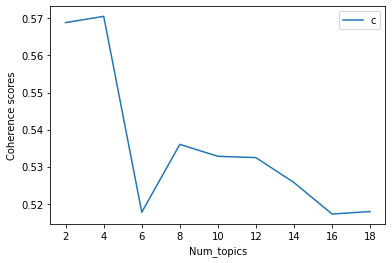

In [70]:
# 시각화
import matplotlib.pyplot as plt

x = range(2, 20, 2) # start = 2, limit = 21, step = 2
plt.plot(x, coherence_values)
plt.xlabel("Num_topics")
plt.ylabel("Coherence scores")
plt.legend(('coherence'), loc='best')
plt.show()

#### Perplexity score를 통해 최적의 topic 수 구하기

In [51]:
def compute_perplexity_score(dictionary, corpus, text, limit, start=4, step=2):
    
    perplexity_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics = num_topics, id2word = dictionary)
        model_list.append(model)
        perplexity_value = ldamodel.log_perplexity(corpus)
        perplexity_values.append(perplexity_value)
    
    return model_list, perplexity_values

In [68]:
model_list2, perplexity_values = compute_perplexity_score(dictionary=dictionary, corpus=corpus, text= tokenize_list,
                                                        start = 2, limit=20, step=2)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

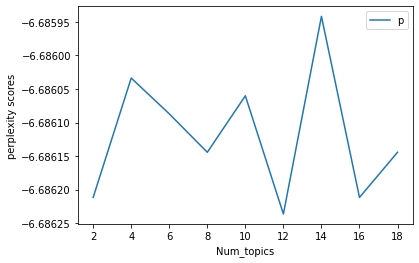

In [71]:
# 시각화
import matplotlib.pyplot as plt

x = range(2, 20, 2) # start = 2, limit = 20, step = 2
plt.plot(x, perplexity_values)
plt.xlabel("Num_topics")
plt.ylabel("perplexity scores")
plt.legend(('perplexity'), loc='best')
plt.show()

 - 구한 최적의 topic개수 k개 

In [82]:
k = 8
opt_ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = k, id2word=dictionary)
opt_ldamodel.print_topics(num_words=6)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0,
  '0.027*"미세먼지" + 0.023*"데이터" + 0.020*"대선" + 0.020*"눈" + 0.017*"빅데이터" + 0.015*"비"'),
 (1,
  '0.056*"대선" + 0.022*"데이터" + 0.013*"박근혜" + 0.011*"미세먼지" + 0.010*"법" + 0.008*"안철수"'),
 (2,
  '0.061*"대선" + 0.032*"후보" + 0.015*"데이터" + 0.012*"사찰" + 0.012*"윤석열" + 0.012*"조회"'),
 (3,
  '0.035*"미세먼지" + 0.030*"대선" + 0.016*"데이터" + 0.014*"후보" + 0.014*"기온" + 0.011*"윤석열"'),
 (4,
  '0.077*"데이터" + 0.024*"디지털" + 0.016*"마이" + 0.014*"대선" + 0.013*"구축" + 0.011*"지원"'),
 (5,
  '0.046*"대선" + 0.028*"미세먼지" + 0.027*"데이터" + 0.019*"날씨" + 0.012*"은행" + 0.010*"후보"'),
 (6,
  '0.064*"미세먼지" + 0.037*"날씨" + 0.036*"추위" + 0.028*"대선" + 0.019*"도" + 0.019*"초미세먼지"'),
 (7,
  '0.069*"대선" + 0.037*"데이터" + 0.024*"후보" + 0.020*"이재명" + 0.019*"윤석열" + 0.011*"마이"')]

In [79]:
!pip install pyLDAvis==2.1.2

In [83]:
# 토픽모델링 결과 시각화
import pyLDAvis
import pyLDAvis.gensim

vis = pyLDAvis.gensim.prepare(opt_ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.save_html(vis, '/content/drive/MyDrive/2022년도 겨울 특강-텍스트마이닝/Text_mining_3강/lda_modeling.html')
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)
